# Sweep graphs
Revive the babies

In [267]:
import pandas as pd
# import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

# set font sizes
import matplotlib 
SMALL_SIZE = 14
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [269]:
def get_data(sweep_name, x_label, y_label, z_label = "val_loss"):
    'Extracts relevant data from the sweep'
    
    pso_df = pd.read_csv("sweep_data/"+sweep_name+".csv")

    x = pso_df[[x_label]]
    y = pso_df[[y_label]]
    z = pso_df[[z_label]]
    
    return x, y, z

In [299]:
def plot_heatmap(z, x_range, y_range, clip_min = 0, clip_max = 1, square = True, grid_space = 6, cmap_lims = (0, 1)):
    'Plots a heatmap with the data'
    
    temp = np.array(z, dtype = 'float')
    # I changed nan from nan=0.0 to nan=100 so that non convergent ones look bad instead of good
    # Even better would be to make them grey and add a label
    #temp = np.nan_to_num(temp, nan=100, posinf=100, neginf=100)
#     temp = np.clip(temp, clip_min, clip_max)
    
    z_array = np.fliplr(temp.reshape((x_range[2], y_range[2])))
    
    #Choose colours for heat map
    cmap = plt.get_cmap("YlGnBu")#('bwr')
#     cmap.set_under(color = 'r', alpha = 0.1)

    heat_map = sb.heatmap(z_array.T, xticklabels=True, yticklabels=True, square = square, 
                          cmap=cmap, vmin=cmap_lims[0], vmax=cmap_lims[1], cbar_kws={'label': 'Val Loss'},
                          mask=np.isnan(z_array.T))
    heat_map.set_facecolor('grey')
    
    # Set x ticks
    plt.xticks(ticks = np.linspace(0, x_range[2]-1, grid_space)+0.5, rotation=0)
    
    # Set x ticks labels
    heat_map.set_xticklabels(np.round(np.linspace(x_range[0], x_range[1], grid_space), 1))
    
    # Set y ticks
    plt.yticks(ticks = np.linspace(0, y_range[2]-1, grid_space)+0.5, rotation=0)
    
    # Set y ticks labels
    heat_map.set_yticklabels(np.flip(np.round(np.linspace(y_range[0], y_range[1], grid_space), 1)))
    
    plt.xlabel(x_range[3])
    plt.ylabel(y_range[3])
    
#     plt.xlim(1) # set the x limits here
    plt.show()

    
    return z_array

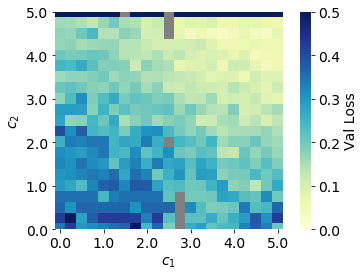

array([[7.43732377e-01, 1.60245730e-01, 1.75001014e-01, 1.69066779e-01,
        2.04409538e-01, 2.47471460e-01, 1.61304342e-01, 2.08965944e-01,
        1.74250015e-01, 2.89497073e-01, 2.82083907e-01, 4.01483679e-01,
        2.60525008e-01, 3.14059756e-01, 3.23845154e-01, 3.03269619e-01,
        2.95504453e-01, 3.51922168e-01, 3.65834471e-01, 4.24139297e-01,
        3.46560816e-01],
       [7.36881038e-01, 1.57665035e-01, 1.66876636e-01, 1.76022903e-01,
        1.90669916e-01, 2.37001000e-01, 1.75702003e-01, 2.19249307e-01,
        2.35367392e-01, 2.91427281e-01, 1.73480969e-01, 3.13920550e-01,
        3.37952483e-01, 3.01210014e-01, 3.09737837e-01, 3.12206093e-01,
        2.73923234e-01, 3.51922168e-01, 3.09178895e-01, 5.27906605e-01,
        4.24139297e-01],
       [7.56286379e-01, 1.44730519e-01, 1.99631787e-01, 1.54391201e-01,
        1.96935398e-01, 2.70808470e-01, 1.74061083e-01, 2.00847570e-01,
        3.14481405e-01, 2.87979478e-01, 1.80811392e-01, 3.73485792e-01,
        3.3102

In [300]:
x, y, z = get_data('pso_16', "c_1", "c_2")

plot_heatmap(z, x_range = (0, 5, 21, "$c_1$"), y_range = (0, 5, 21, "$c_2$"), cmap_lims = (0, 0.5))

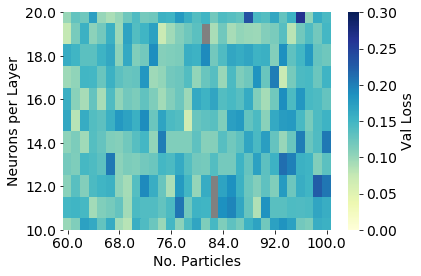

array([[0.09885576, 0.07683102, 0.16006999, 0.09663942, 0.15782898,
        0.16417529, 0.10511485, 0.1189754 , 0.10765635, 0.14853507,
        0.09955927],
       [0.12918897, 0.11625064, 0.15005634, 0.10318551, 0.10706988,
        0.08420939, 0.11473347, 0.11313901, 0.1348248 , 0.15036603,
        0.11176002],
       [0.12300447, 0.15578422, 0.13464634, 0.14890178, 0.0924053 ,
        0.15958845, 0.09561145, 0.14721215, 0.11117489, 0.14664693,
        0.17220305],
       [0.17336598, 0.1060809 , 0.13393258, 0.14805727, 0.12847415,
        0.13920709, 0.13776514, 0.14264222, 0.14303811, 0.0944128 ,
        0.1631457 ],
       [0.09978662, 0.1205752 , 0.1532205 , 0.12607162, 0.09155401,
        0.13293108, 0.12882305, 0.13277124, 0.15060377, 0.11171948,
        0.12994367],
       [0.08915258, 0.15653202, 0.16486984, 0.15566943, 0.14173649,
        0.15589487, 0.11146621, 0.20521904, 0.15486565, 0.11730319,
        0.16155058],
       [0.1003656 , 0.09754771, 0.10641409, 0.13335494, 0.

In [361]:
x, y, z = get_data('pso_17', "num_particles", "num_per_layer")
# print(x, y, z)

plot_heatmap(z, x_range = (60, 100, 31, "No. Particles"), y_range = (10, 20, 11, "Neurons per Layer"), square = False, cmap_lims = (0, 0.3))

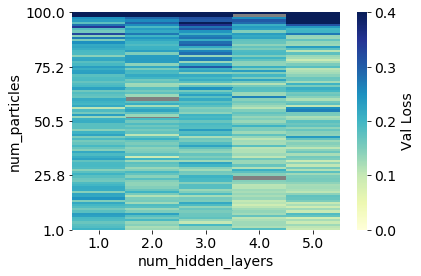

array([[16.36203098,  0.5150085 ,  1.24914577,  0.24690081,  0.23303328,
         0.17901121,  0.28086599,  0.34338993,  0.18161623,  0.16041351,
         0.32555591,  0.14325963,  0.27082344,  0.15434844,  0.25145896,
         0.21762736,  0.22224194,  0.21121446,  0.19393394,  0.19110657,
         0.14319941,  0.21801015,  0.21959165,  0.18198094,  0.19605167,
         0.23228587,  0.21070026,  0.22943687,  0.23084351,  0.18043627,
         0.1898909 ,  0.19084662,  0.17098241,  0.18644555,  0.19396288,
         0.22896971,  0.16348821,  0.1856381 ,  0.17555752,  0.16982398,
         0.21440659,  0.20417005,  0.1976643 ,  0.21604405,  0.10668261,
         0.1882947 ,  0.15873383,  0.22997094,  0.13411802,  0.20779802,
         0.21117241,  0.18073511,  0.18124726,  0.18056139,  0.14465362,
         0.20460096,  0.22453918,  0.15418244,  0.19183948,  0.15660984,
         0.16996267,  0.19499456,  0.16885137,  0.14659288,  0.2186364 ,
         0.19124251,  0.2095707 ,  0.22605266,  0.1

In [302]:
x, y, z = get_data('pso_18', "num_hidden_layers", "num_particles")

plot_heatmap(z, x_range = (1,5,5, "num_hidden_layers"), y_range = (1,100,100, "num_particles"), square = False, grid_space = 5, cmap_lims = (0, 0.4))

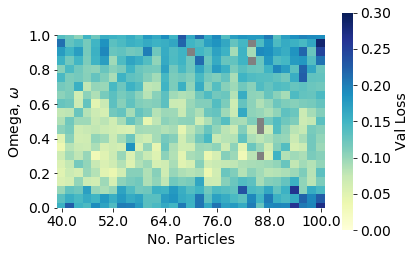

In [360]:
x, y, z = get_data('pso_19',"num_particles", "omega")

z_array = plot_heatmap(z, x_range = (40,100,31, "No. Particles"), y_range = (0,1,21, "Omega, $\omega$"), cmap_lims = (0, 0.3))

[0.21718703 0.19584918 0.176651   0.1595925  0.14467367 0.13189452
 0.12125505 0.11275525 0.10639513 0.10217468 0.10009391 0.10015281
 0.10235139 0.10668964 0.11316757 0.12178518 0.13254246 0.14543941
 0.16047604 0.17765235 0.19696833]


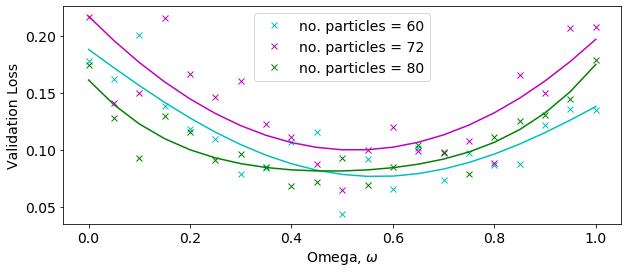

In [352]:
omega_range = np.linspace(0, 1, 21)

plt.figure(figsize = [10, 4])

plt.plot(omega_range, z_array[10, :], 'cx', label = "no. particles = "+str(np.unique(np.array(x))[10]))
p1 = np.poly1d(np.polyfit(omega_range, z_array[10, :], 4))
plt.plot(omega_range, p1(omega_range),'c-')

plt.plot(omega_range, z_array[16, :], 'mx', label = "no. particles = "+str(np.unique(np.array(x))[16]))
p2 = np.poly1d(np.polyfit(omega_range, z_array[16, :], 2))
plt.plot(omega_range, p2(omega_range), 'm-')
print(p2(omega_range))

plt.plot(omega_range, z_array[20, :], 'gx', label = "no. particles = "+str(np.unique(np.array(x))[20]))
p3 = np.poly1d(np.polyfit(omega_range, z_array[20, :], 4))
plt.plot(omega_range, p3(omega_range), 'g-')

plt.ylabel("Validation Loss")
plt.xlabel("Omega, $\omega$")
plt.legend()

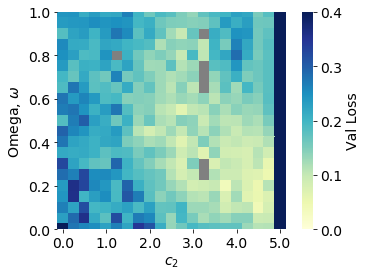

In [359]:
x, y, z = get_data('pso_20',"c_2", "omega")
# print(x, y, z)

z_array = plot_heatmap(z, x_range = (0, 5, 21, "$c_2$"), y_range = (0,1,21, "Omega, $\omega$"), cmap_lims = (0, 0.4))

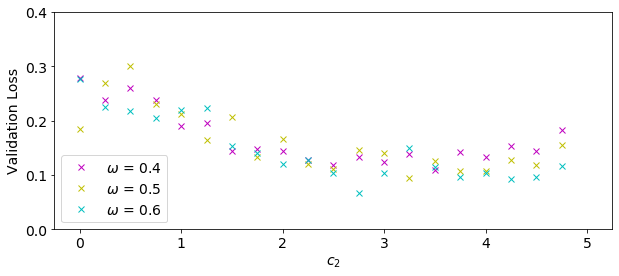

In [357]:
c2_range = np.linspace(0, 5, 21)

plt.figure(figsize = [10, 4])

plt.plot(c2_range, z_array[:, 8], 'mx', label = "$\omega$ = "+str(np.unique(np.array(y))[8]))
# p1, residuals, rank, singular_values, rcond =np.polyfit(c2_range, z_array[:, 8], 2, full = True)
# print(residuals, rank, singular_values, rcond)
# p1 =  np.poly1d(p1)
# plt.plot(c2_range, p1(c2_range), 'm-')

plt.plot(c2_range, z_array[:, 10], 'yx', label = "$\omega$ = "+str(np.unique(np.array(y))[10]))
# p2 = np.poly1d(np.polyfit(c2_range, z_array[:, 10], 2))
# plt.plot(c2_range, p2(c2_range), 'g-')

plt.plot(c2_range, z_array[:, 12], 'cx', label = "$\omega$ = "+str(np.unique(np.array(y))[12]))
# p3 = np.poly1d(np.polyfit(c2_range, z_array[:, 12], 2))
# plt.plot(c2_range, p3(c2_range), 'c-')

plt.ylabel("Validation Loss")
plt.xlabel("$c_2$")
plt.ylim(0, 0.4)
plt.legend()

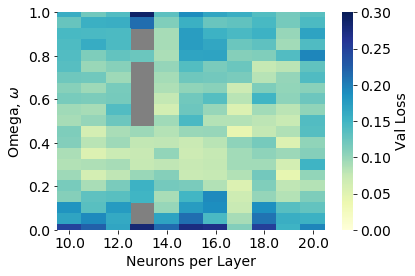

array([[0.15917516, 0.12734551, 0.14630423, 0.14257362, 0.14035727,
        0.13652579, 0.12286972, 0.1084152 , 0.11643244, 0.09597123,
        0.0924507 , 0.11361268, 0.11108181, 0.08945959, 0.08644075,
        0.09679051, 0.11603767, 0.10957212, 0.18409303, 0.16768236,
        0.24853851],
       [0.12182871, 0.1559765 , 0.14495697, 0.1601435 , 0.11314328,
        0.09874319, 0.12130426, 0.09698216, 0.11477854, 0.09222409,
        0.10183744, 0.06293014, 0.08214638, 0.05498616, 0.08825272,
        0.06289268, 0.09086467, 0.13156778, 0.13529288, 0.19319598,
        0.22269616],
       [0.14009922, 0.15747018, 0.14391607, 0.14352478, 0.12890816,
        0.108028  , 0.09684804, 0.11633628, 0.11761821, 0.13963076,
        0.12403056, 0.09129274, 0.09622562, 0.07039268, 0.09226705,
        0.07919552, 0.11508389, 0.13593252, 0.17737155, 0.16345453,
        0.16662967],
       [0.2896591 , 0.21338109,        nan,        nan, 0.12536046,
               nan,        nan,        nan,        na

In [358]:
x, y, z = get_data('pso_21',"num_per_layer", "omega")
# print(x, y, z)

plot_heatmap(z, x_range = (10, 20, 11, "Neurons per Layer"), y_range = (0,1,21, "Omega, $\omega$"), square = False, cmap_lims = (0, 0.3))